## Contexto del problema, preguntas y dataset

#### Se solicita realizar un  analisis de ventas e ingresos y sistemas de recomendación de productos basados en la información incluida en el dataset 'Walmart'

## Exploración del dataset

In [46]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter

#Cargue de archivo 
df = pd.read_csv('walmart.csv', delimiter = ',', header = 0, )

## Información y  EDA del dataset

- Se evidencia que tenemos un DF de 550068 registros y 10 columnas.
- No se presentan datos null.
- Se tienen 5 campos de datos de tipo entero y 5 de tipo categórico.
- NO hay registros duplicados 

In [47]:
if df is not None:

    print("\n--- Estadísticas Descriptivas (Variables Numéricas) ---")
    print(df.describe()) # Estadísticas de columnas numéricas (Purchase)

    print("\n--- Estadísticas Descriptivas (Variables Categóricas) ---")
    print(df.describe(include='object')) # Estadísticas de columnas categóricas

    print("\n--- Conteo de Valores Nulos por Columna ---")
    print(df.isnull().sum()) # Cuántos valores nulos hay en cada columna

    print("\n--- Conteo de Filas Duplicadas ---")
    print(f"Número de filas duplicadas: {df.duplicated().sum()}") # ¿Hay filas duplicadas?


--- Estadísticas Descriptivas (Variables Numéricas) ---
            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000  

--- Estadísticas Descriptivas (Variables Categóricas) ---
       Product_ID  Gender   

## Visualizaciones para analisis exploratorio

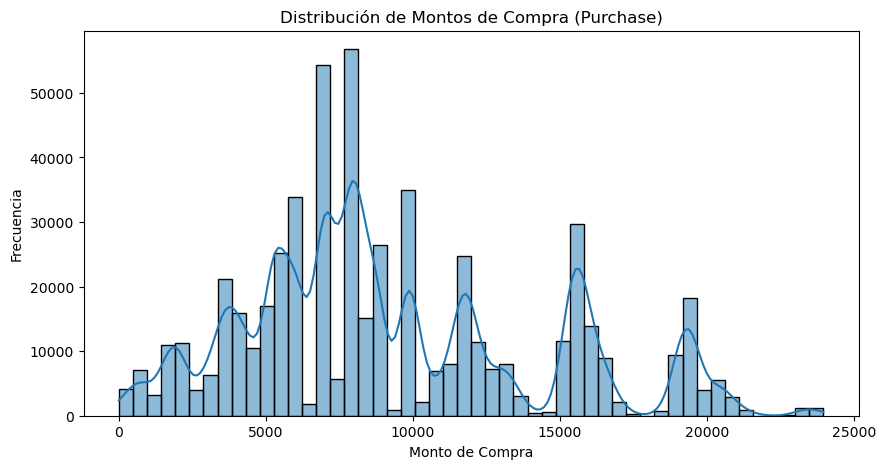

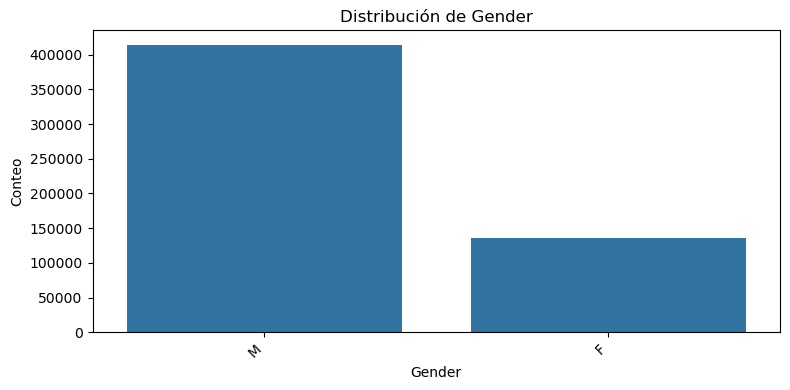

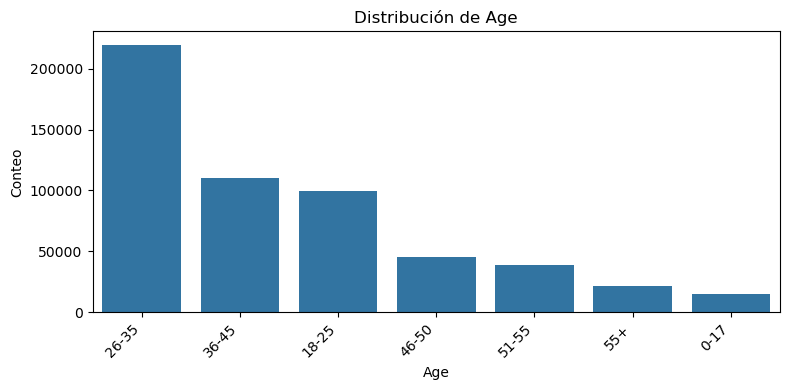

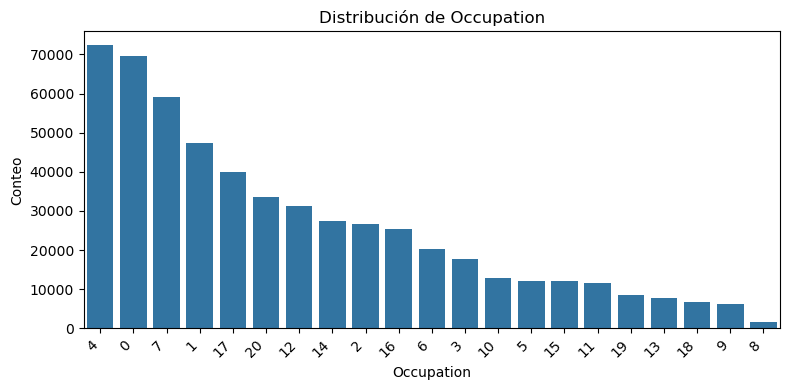

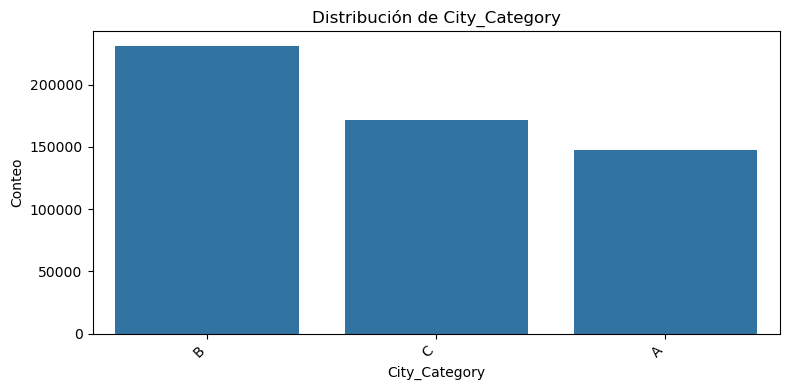

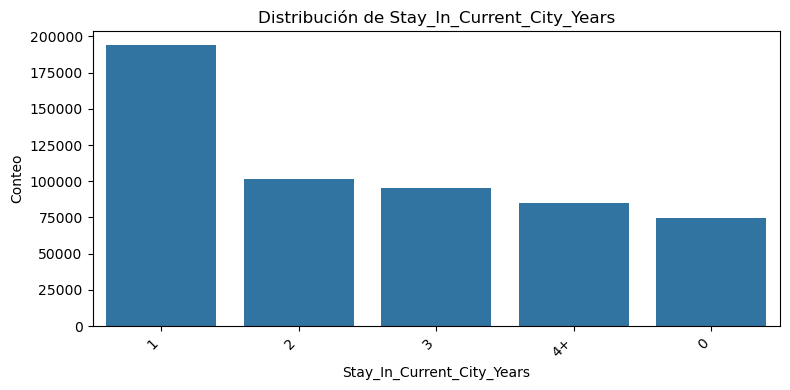

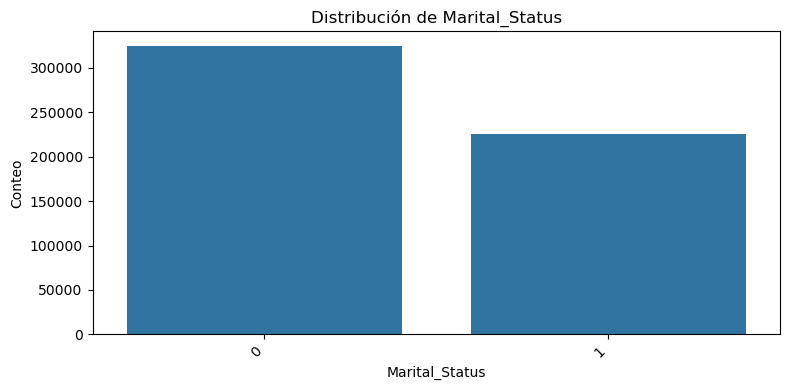

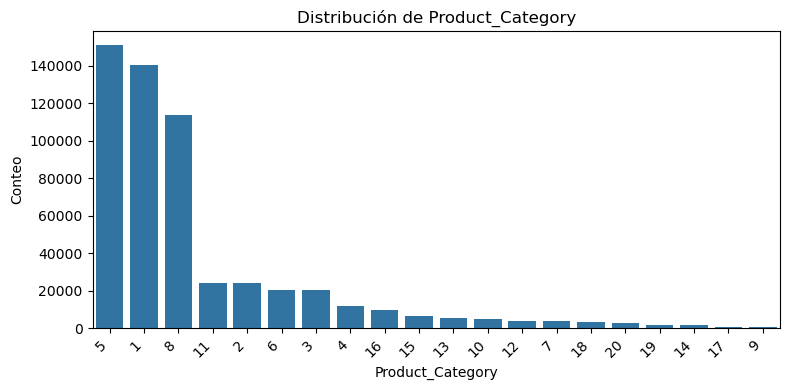

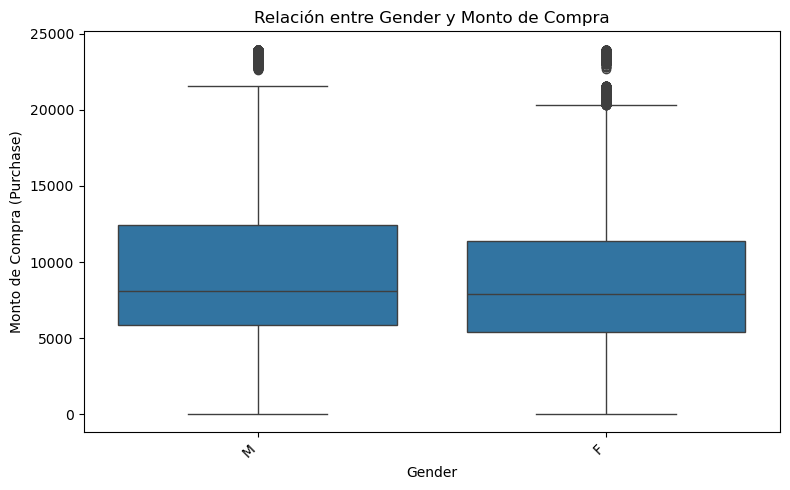

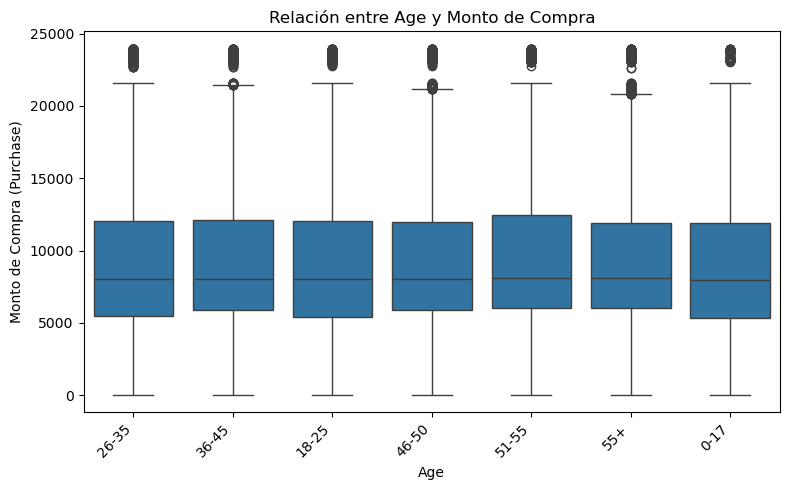

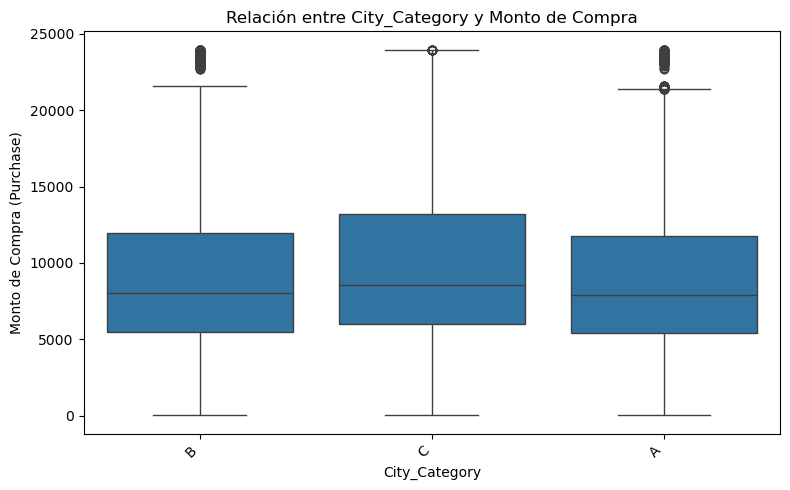

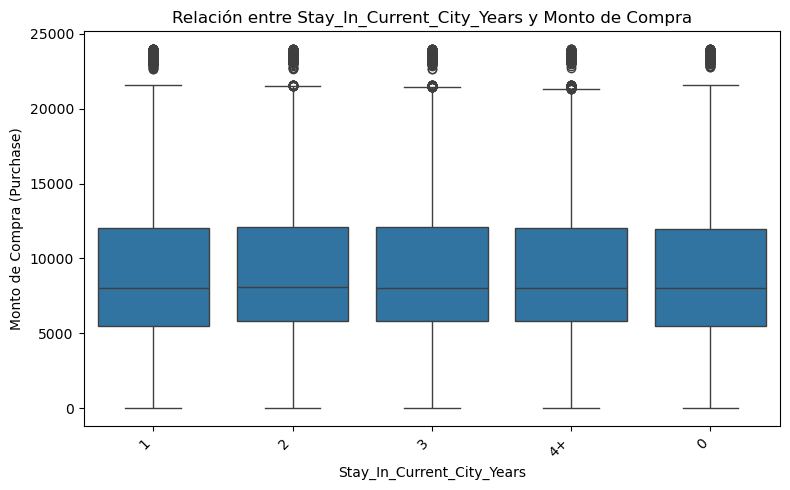

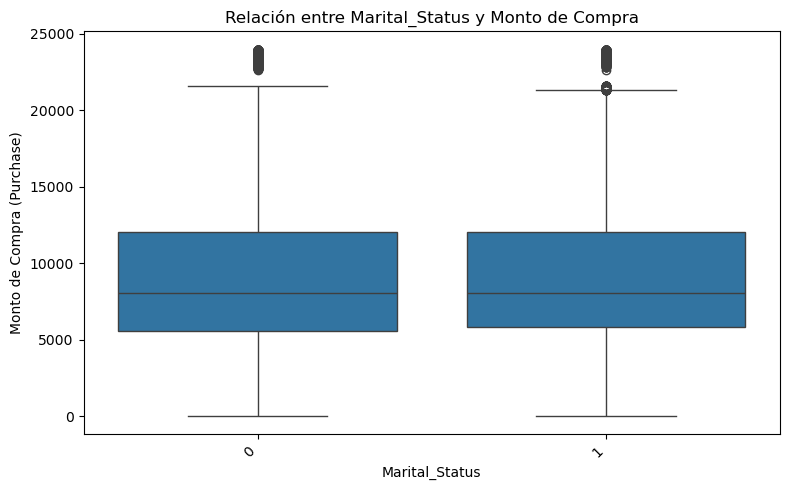

In [48]:
if df is not None:
    # Distribución de la Variable Objetivo 'Purchase' (Histograma)
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Purchase'], kde=True, bins=50) # Ajusta 'bins' para la granularidad del histograma
    plt.title('Distribución de Montos de Compra (Purchase)')
    plt.xlabel('Monto de Compra')
    plt.ylabel('Frecuencia')
    plt.show()

    # Grafico de dispersión entre edad y compras.
    plt.scatter(df['Age'], df['Purchase'], alpha=0.5)
    plt.xlabel('Rangos de edad')
    plt.ylabel('Compras $')
    plt.title('Gráfica de dispersión EDAD / COMPRAS')
    plt.grid(True)
    plt.show()

    # Distribución de Variables Categóricas (Gráficos de Barras)
    categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, order = df[col].value_counts().index) # Ordenar barras por frecuencia
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
        plt.tight_layout() # Ajustar para que las etiquetas no se superpongan
        plt.show()

    # Relación entre Variables Categóricas y 'Purchase' (Boxplots)
    categorical_cols2 = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
    for col in categorical_cols2:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=col, y='Purchase', data=df, order = df[col].value_counts().index) # Ordenar categorías del eje x por frecuencia
        plt.title(f'Relación entre {col} y Monto de Compra')
        plt.xlabel(col)
        plt.ylabel('Monto de Compra (Purchase)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()




## Conclusiones de analisis exploratorio de forma visual.

- La mayoria de las compras realizadas se concentran entre los 5000 y los 10000.
- El genero masculino es mas frecuente al realizar las compras
- El rango de edades mas frecuente al comprar es entre 26-35 años y el menor es entre 0 - 17 años
- La catergoría de ciudad que predomina es la B seguida de la C y por ultimo la A
- Se puede concluir que las personas que llevan menos tiempo viviendo la ciudad, son las que mas realizan compras.
- Las personas solteras ( 0 ) realizan mas compras
- En cuanto a la relación del monto de compra y los campos categóricos, hay una correlación muy similr en todas las categorías analizadas.

## Limpieaza de datos

- Valores 4+ en columna 'Stay_In_Current_City_Years'.
Se reemplazrá el valor 4+ por 4, para poder realizar un analisis mas congruente
Además se convertirán los valores string a numéricos

In [49]:
if df is not None:
    print("\n--- Valores Únicos en 'Stay_In_Current_City_Years' ANTES de limpieza ---")
    print(df['Stay_In_Current_City_Years'].unique())

    # Reemplazar '4+' con '4'
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

    # Convertir a tipo numérico (entero) - 'coerce' convierte no válidos a NaN
    df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])

    print("\n--- Valores Únicos en 'Stay_In_Current_City_Years' DESPUÉS de limpieza y conversión ---")
    print(df['Stay_In_Current_City_Years'].unique())



--- Valores Únicos en 'Stay_In_Current_City_Years' ANTES de limpieza ---
['2' '4+' '3' '1' '0']

--- Valores Únicos en 'Stay_In_Current_City_Years' DESPUÉS de limpieza y conversión ---
[2 4 3 1 0]


- Convetir columnas catericos a tipo de dato categórico. El único que es valor numérico es el de Compras.

In [50]:
if df is not None:
    categorical_cols_to_convert = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'User_ID', 'Product_ID']
    for col in categorical_cols_to_convert:
        if col in df.columns: # Asegurar que la columna exista antes de intentar convertir
            df[col] = df[col].astype('category')

    print("\n--- Tipos de datos DESPUÉS de conversiones a 'category' ---")
    print(df.dtypes) # Verificar los tipos de datos


--- Tipos de datos DESPUÉS de conversiones a 'category' ---
User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object


## Análisis de datos

### Analisis de ventas e ingresos


--- Ventas Totales por Categoría de Producto ---
Product_Category
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
7       60896731
4       27380488
14      20014696
18       9290201
9        6370324
17       5878699
12       5331844
13       4008601
20        944727
19         59378
Name: Purchase, dtype: int64


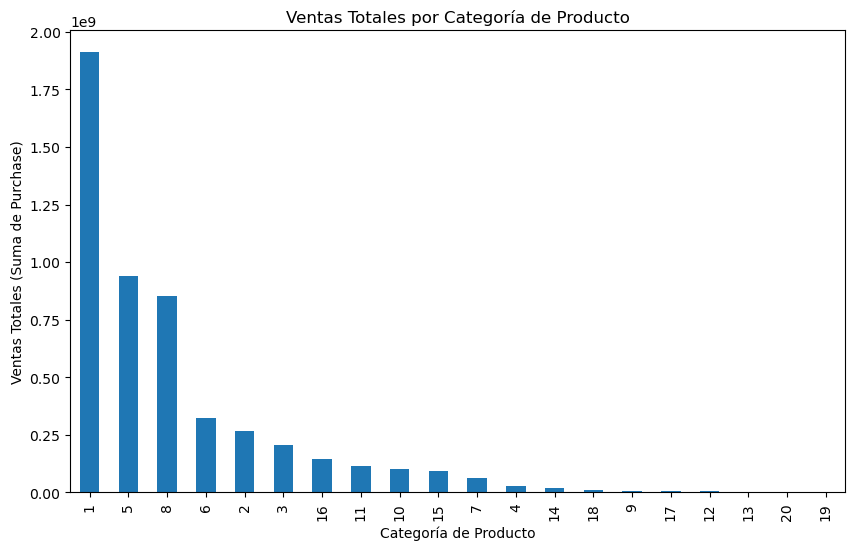


--- Ventas Totales por Género ---
Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


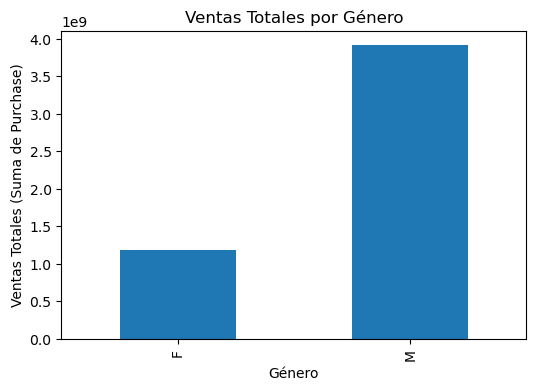


--- Ventas Totales por Categoría de Ciudad ---
City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64


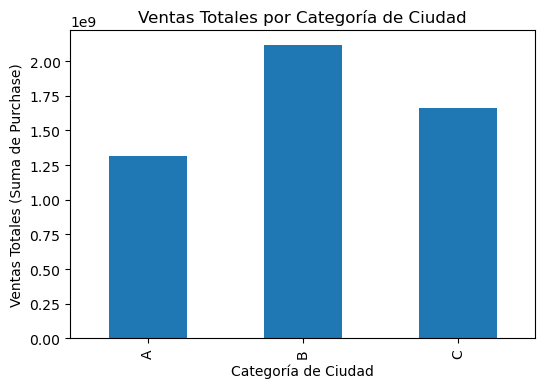


--- Ventas Totales por Categoría de estado civíl ---
Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64


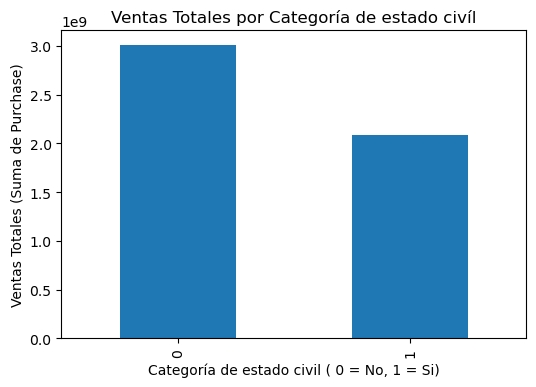


--- Ventas Totales por Categoría de estado civíl ---
Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64


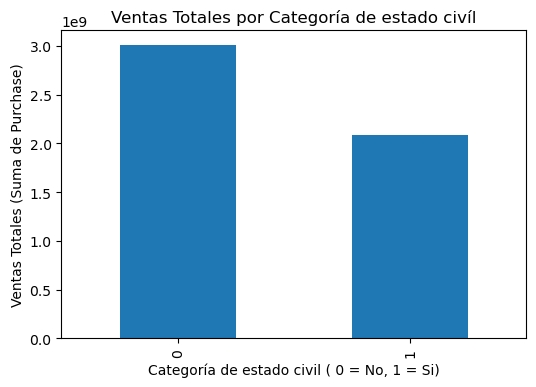

In [51]:
    # Tendencias de Ventas 

    # Análisis de Ventas por Categoría de Producto
    sales_by_category = df.groupby('Product_Category', observed=False)['Purchase'].sum().sort_values(ascending=False)
    print("\n--- Ventas Totales por Categoría de Producto ---")
    print(sales_by_category)

    plt.figure(figsize=(10, 6))
    sales_by_category.plot(kind='bar')
    plt.title('Ventas Totales por Categoría de Producto')
    plt.xlabel('Categoría de Producto')
    plt.ylabel('Ventas Totales (Suma de Purchase)')
    plt.show()

   # Análisis de Ventas por Género
    sales_by_gender = df.groupby('Gender', observed=False)['Purchase'].sum()
    print("\n--- Ventas Totales por Género ---")
    print(sales_by_gender)

    plt.figure(figsize=(6, 4))
    sales_by_gender.plot(kind='bar')
    plt.title('Ventas Totales por Género')
    plt.xlabel('Género')
    plt.ylabel('Ventas Totales (Suma de Purchase)')
    plt.show()

    # Análisis de Ventas por Categoría de Ciudad
    sales_by_city = df.groupby('City_Category', observed=False)['Purchase'].sum()
    print("\n--- Ventas Totales por Categoría de Ciudad ---")
    print(sales_by_city)

    plt.figure(figsize=(6, 4))
    sales_by_city.plot(kind='bar')
    plt.title('Ventas Totales por Categoría de Ciudad')
    plt.xlabel('Categoría de Ciudad')
    plt.ylabel('Ventas Totales (Suma de Purchase)')
    plt.show()

    # Análisis de Ventas por Categoría de Estado civil
    sales_by_city = df.groupby('Marital_Status', observed=False)['Purchase'].sum()
    print("\n--- Ventas Totales por Categoría de estado civíl ---")
    print(sales_by_city)

    plt.figure(figsize=(6, 4))
    sales_by_city.plot(kind='bar')
    plt.title('Ventas Totales por Categoría de estado civíl')
    plt.xlabel('Categoría de estado civil ( 0 = No, 1 = Si)')
    plt.ylabel('Ventas Totales (Suma de Purchase)')
    plt.show()

    # Análisis de Ventas por Categoría de rango de edad
    sales_by_city = df.groupby('Marital_Status', observed=False)['Purchase'].sum()
    print("\n--- Ventas Totales por Categoría de estado civíl ---")
    print(sales_by_city)

    plt.figure(figsize=(6, 4))
    sales_by_city.plot(kind='bar')
    plt.title('Ventas Totales por Categoría de estado civíl')
    plt.xlabel('Categoría de estado civil ( 0 = No, 1 = Si)')
    plt.ylabel('Ventas Totales (Suma de Purchase)')
    plt.show()

    # (Puedes seguir explorando ventas por otras dimensiones: Estado Civil, Rango de Edad, etc.)

 

### Sistema de recomendación de productos.


--- Top 10 Productos Más Populares (IDs) ---
['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00057642', 'P00184942', 'P00046742', 'P00058042', 'P00145042', 'P00059442']

--- Top 5 Categorías de Producto Más Populares (IDs de Categoría) ---
[5, 1, 8, 11, 2]

--- Top Categorías de Producto Más Populares (Conteo) ---
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
Name: count, dtype: int64


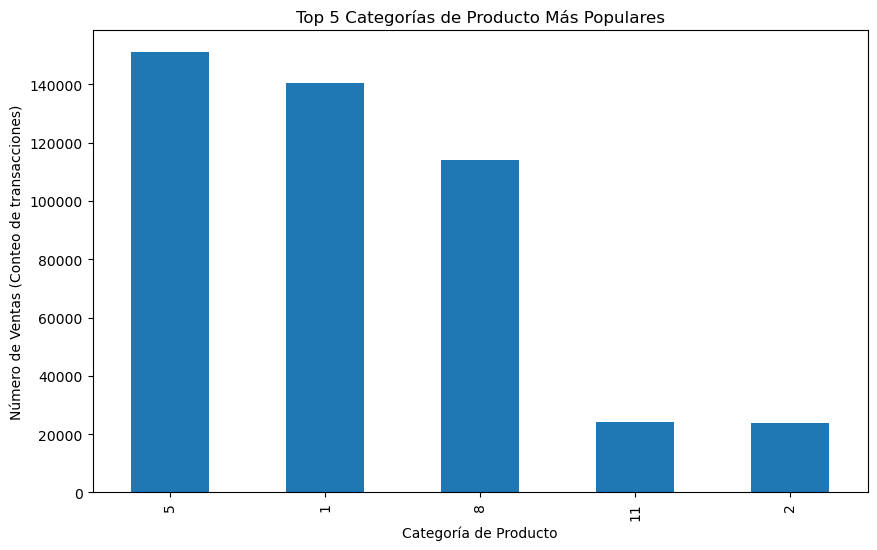

In [52]:
    # Sistema de recomendación simple basado en popularidad: recomendar los productos más comprados en general
    product_popularity = df['Product_ID'].value_counts().sort_values(ascending=False)
    top_n_products = 10 # Recomendar los 10 productos más populares
    top_popular_product_ids = product_popularity.head(top_n_products).index.tolist()

    print(f"\n--- Top {top_n_products} Productos Más Populares (IDs) ---")
    print(top_popular_product_ids)

    category_popularity = df['Product_Category'].value_counts().sort_values(ascending=False)
    top_n_categories = 5 # Top 5 categorías más populares
    top_popular_categories = category_popularity.head(top_n_categories).index.tolist()

    print(f"\n--- Top {top_n_categories} Categorías de Producto Más Populares (IDs de Categoría) ---")
    print(top_popular_categories)

    print("\n--- Top Categorías de Producto Más Populares (Conteo) ---")
    print(category_popularity.head(top_n_categories))

    plt.figure(figsize=(10, 6))
    category_popularity.head(top_n_categories).plot(kind='bar')
    plt.title(f'Top {top_n_categories} Categorías de Producto Más Populares')
    plt.xlabel('Categoría de Producto')
    plt.ylabel('Número de Ventas (Conteo de transacciones)')
    plt.show()


## Exportación de archivo preparado para visualización en Power BI.

In [61]:
import pandas as pd # Asegúrate de tener Pandas importado

# Suponiendo que tu DataFrame limpiado y listo para exportar se llama 'df'
if df is not None: # Verifica que el DataFrame exista
    nombre_archivo_exportacion = 'walmart_listo.csv' #  <- Nombre del archivo: walmart_ok.csv

    try:
        df.to_csv(nombre_archivo_exportacion, index=False) # Exportar a CSV sin índice
        print(f"\nDataFrame exportado exitosamente a '{nombre_archivo_exportacion}' en formato CSV.")
        print(f"El archivo CSV 'walmart_listo.csv' se ha guardado en la misma ubicación que tu notebook.")
    except Exception as e:
        print(f"\n¡ERROR al exportar el DataFrame a CSV! Error: {e}")


DataFrame exportado exitosamente a 'walmart_listo.csv' en formato CSV.
El archivo CSV 'walmart_listo.csv' se ha guardado en la misma ubicación que tu notebook.
